In [57]:
import iris 
import matplotlib.pyplot as plt
import iris.coord_categorisation
import numpy as np
import cartopy as cart
import os
import pandas as pd
import cartopy as cart
import glob

In [108]:
#--------------------------------------------------------------------------
# LOAD DATAFRAMES
#--------------------------------------------------------------------------

os.chdir('C:\\Users\\fb428\\OneDrive - University of Exeter\\Documents\\PhD\\papers\\manuscript3\\figures_and_data\\figure_making\\output_files\\')

site_info = pd.read_csv('station_info.csv')

site_data = pd.read_csv('monthly_DOR_site.csv')
UKESM_data = pd.read_csv('monthly_DOR_UKESM.csv')

In [109]:
site_data_compact = site_data[['item', 'Month', 'climatology', 'site_std']]

In [110]:
#--------------------------------------------------------------------------
# MERGE ALL SITES AND ADD NAMES
#--------------------------------------------------------------------------

locs = site_info[['item', 'name']].drop_duplicates()
chose_names = ['Amazonas', 'Porto Velho', 'Santarem', 'Congo', 'Bukit Koto', 'Watukosek',  'Daintree', 'Panama' ]

site_names = pd.merge(site_data_compact, locs, on=['item'])
UKESM_names = pd.merge(UKESM_data, locs, on=['item'])

site_choice = site_names[site_names['name'].isin(chose_names)]
UKESM_choice = UKESM_names[UKESM_names['name'].isin(chose_names)]

n = len(chose_names)


In [111]:
month_list = ['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D']

In [112]:
sites = site_choice.groupby(['name', 'Month']).mean().reset_index()
UKESMs = UKESM_choice.groupby(['name', 'Month']).mean().reset_index()

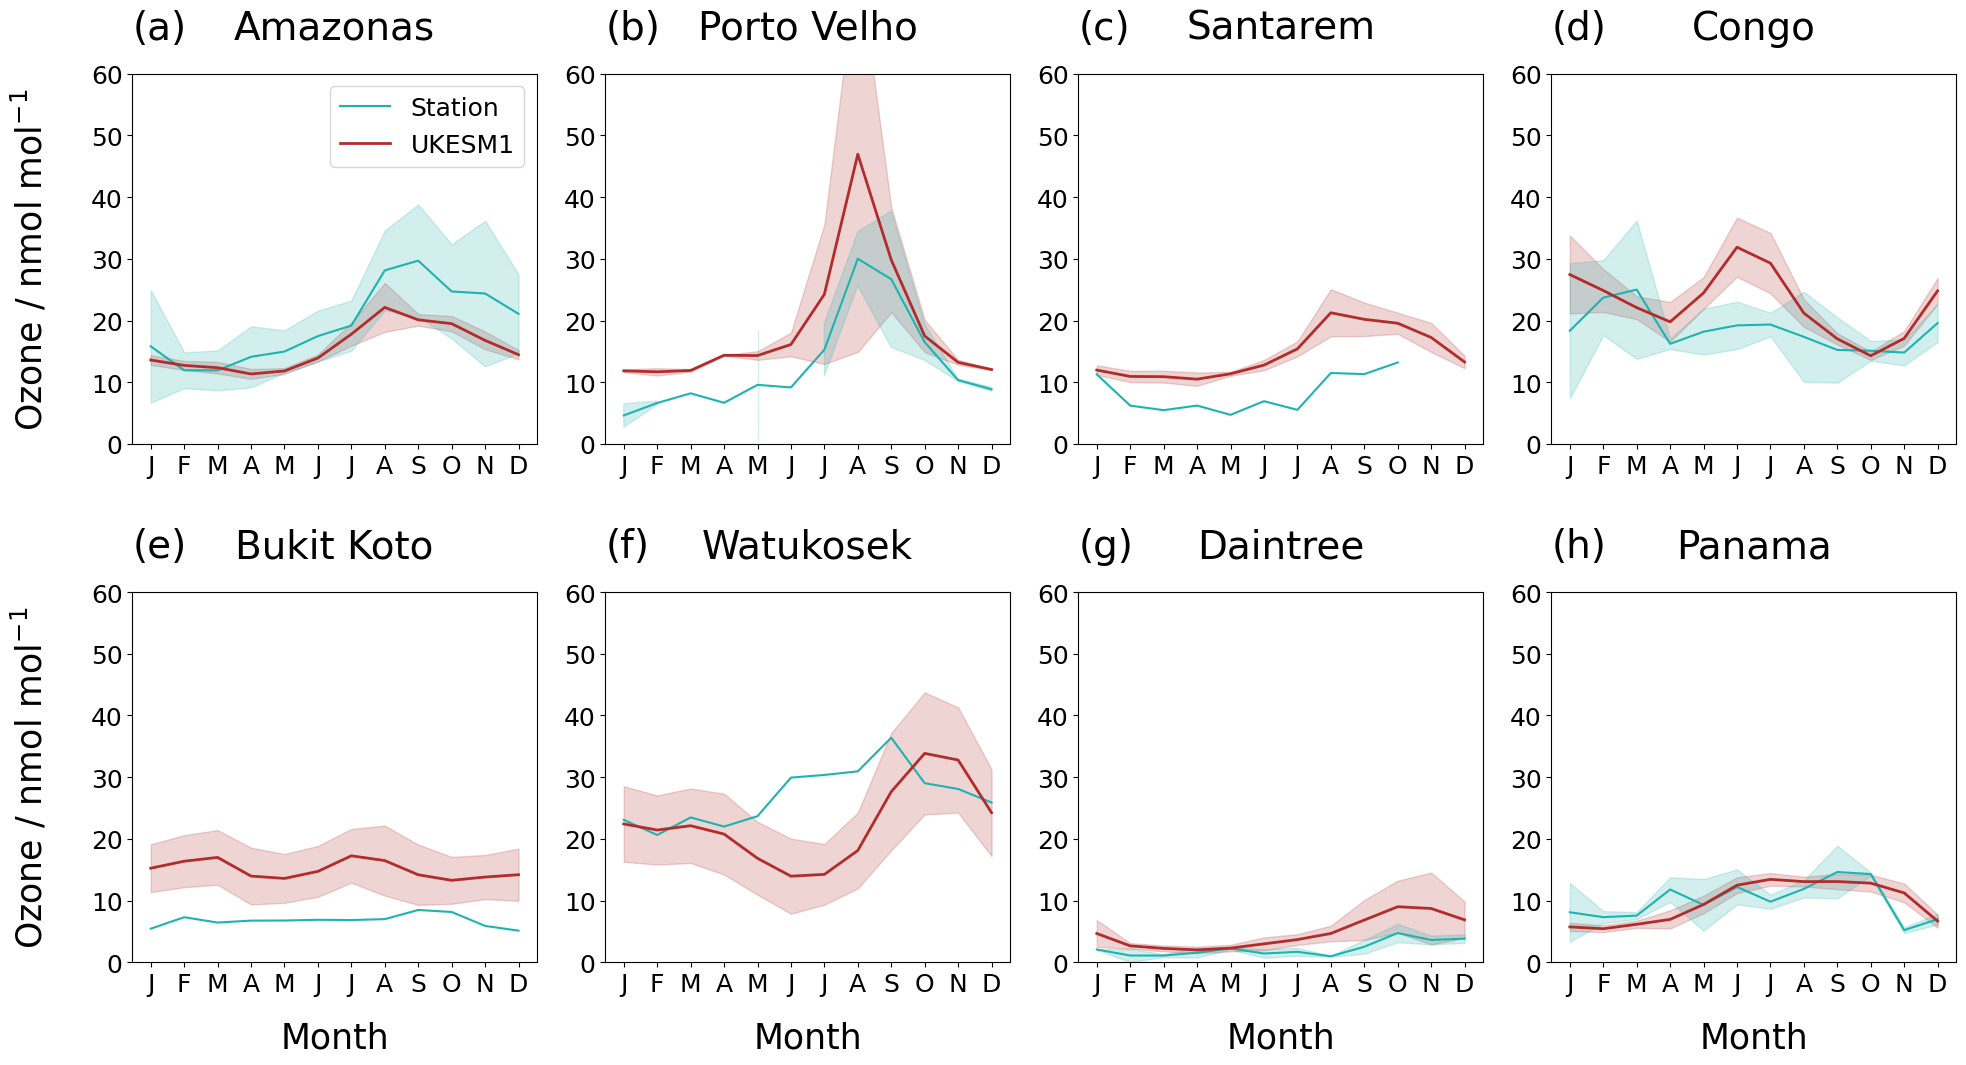

In [113]:
#----------------------------------------------------------------
# monthly mean
#----------------------------------------------------------------

plt.figure(figsize=(20,11))
plt.rcParams['font.size']=18

letter_labels = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)', '(g)', '(h)', '(j)', '(k)']

for i in range(n):
    plt.subplot(2,4,i+1)
    
    site_name = chose_names[i]
    
#--------------------------------mean data--------------------------------------------
     
    site_df = sites[sites['name'] == site_name]    
    site_data = site_df['climatology'].values
    
    UKESM_df = UKESMs[UKESMs['name'] == site_name]    
    UKESM_data = UKESM_df['Ozone_avg'].values
    
        
    plt.errorbar(site_df['Month'].values, site_data,
                 elinewidth = 1,  color=[0.1157, 0.7022, 0.6843], label = 'Station')
    
    
    plt.errorbar(UKESM_df['Month'].values, UKESM_data,
                 elinewidth = 1, color=[0.6980, 0.1725, 0.1725], linewidth=2, label = 'UKESM1')
    
#--------------------------------std data--------------------------------------------

  
    yerr_site = site_df['site_std'].values
    yerr_UKESM = UKESM_df['std_UKESM'].values
    
    plt.fill_between(UKESM_df['Month'].values, UKESM_data+yerr_UKESM, UKESM_data-yerr_UKESM, 
                     color=[0.6980, 0.1725, 0.1725], alpha = 0.2)
    
    plt.fill_between(site_df['Month'].values, site_data+yerr_site, site_data-yerr_site, 
                     color=[0.1157, 0.7022, 0.6843], alpha = 0.2)
    

    # axes
    plt.title(site_name, size=28, pad=25)
    plt.title(letter_labels[i], loc='left', size=28, pad=25)
    plt.ylim(0,60)
    plt.xticks(UKESM_df['Month'].values, month_list)

for i in [1,5]:
    plt.subplot(2,4,i)    
    plt.ylabel('Ozone / nmol mol$^{-1}$', size = 25, labelpad = 30)
    
for i in range(5,9):
    plt.subplot(2,4,i) 
    plt.xlabel('Month', size = 25, labelpad = 18)

plt.tight_layout()
plt.subplots_adjust(hspace=0.4)

plt.subplot(241)
plt.legend()

plt.savefig('figures/seasonal_DOR.png', dpi=300)

In [94]:

cor = pd.merge(UKESMs,sites, on=['name', 'Month'])

In [95]:
cor['name'].drop_duplicates()

0        Amazonas
12     Bukit Koto
24          Congo
36       Daintree
48         Panama
60    Porto Velho
72       Santarem
82      Watukosek
Name: name, dtype: object

In [97]:
np.polyfit(cor['Ozone_avg'], cor['climatology'], 1)

array([0.83947805, 0.24006652])

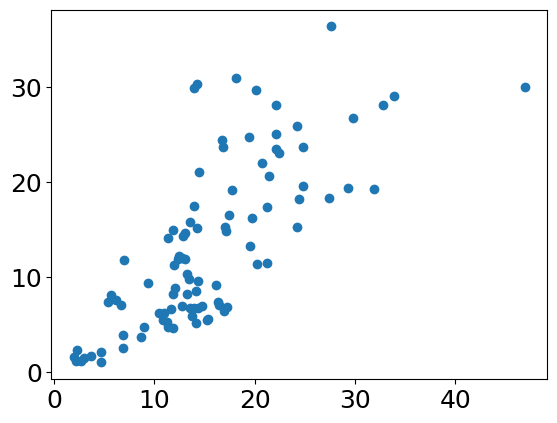

In [98]:
plt.scatter(cor['Ozone_avg'], cor['climatology'])

In [99]:
from scipy import stats
stats.pearsonr(cor['Ozone_avg'].values, cor['climatology'].values)

PearsonRResult(statistic=0.7492240155616579, pvalue=3.791032981377238e-18)

In [100]:
0.7492240155616579**2

0.5613366254943353

In [102]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

rmse(cor['Ozone_avg'].values, cor['climatology'].values)

6.299335749036568

In [116]:
max(sites[sites['name'] == 'Congo']['climatology'])

25.00873602

In [117]:
max(UKESMs[UKESMs['name'] == 'Congo']['Ozone_avg'])

31.88525

In [105]:
UKESMs[UKESMs['name'] == 'Bukit Koto']['Ozone_avg'].values - sites[sites['name'] == 'Bukit Koto']['climatology'].values

array([ 9.80122701,  9.07653116, 10.55624669,  7.21874725,  6.8234666 ,
        7.84244913, 10.41338009,  9.48675779,  5.71030835,  5.13120177,
        7.9179078 ,  9.06609193])

In [106]:
np.mean(UKESMs[UKESMs['name'] == 'Porto Velho']['Ozone_avg'].values - sites[sites['name'] == 'Porto Velho']['climatology'].values)

5.959194479333333

In [114]:
np.max(UKESMs[UKESMs['name'] == 'Porto Velho']['Ozone_avg'].values - sites[sites['name'] == 'Porto Velho']['climatology'].values)

16.93542668